**This notebook contains the code related to the ML model I have developed,that helps predict the most suitable crop that can be grown, after analysing many features of the soil and environment.**

---



**Step 1 : Importing the data and necessary libraries.**








In [81]:
#importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
#importing the required dataset.
df = pd.read_csv('/content/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee




---



**Step 2 : Description of dataset and splitting the data into labels and features.**

In [83]:
#printing the shape of the dataset.
df.shape

(2200, 8)

In [84]:
#description of the data showing mean,standard deviation and various percentiles of the data.
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


*In this dataset the label is the type of crop as it depends on various parameters and N(Nitrogen content), P(Phosporous content), K(Potassium content), Temperature, Humidity, pH and rainfall are the various features that effect the type of crop that is to be grown.*

In [85]:
#Splitting the data into label and features.
x=df.iloc[:,0:7]
y=df.iloc[:,-1]

In [86]:
print(x)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


In [87]:
print(y)

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


In [88]:
#The different labels and their count of repitition in the dataset.
df['label'].value_counts()

chickpea       100
jute           100
watermelon     100
muskmelon      100
maize          100
pomegranate    100
mothbeans      100
papaya         100
banana         100
kidneybeans    100
orange         100
blackgram      100
lentil         100
cotton         100
coconut        100
grapes         100
mango          100
pigeonpeas     100
rice           100
mungbean       100
apple          100
coffee         100
Name: label, dtype: int64

**Step 3: Handling the missing values in the dataset**

In [89]:
#checking for missing values
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

 *From above we come to know that there are no missing values in any of the columns and hence we can proceed.
In case there are any missing values we replace them with the average value of the column.* 

In [90]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [91]:
df.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

**Step 4: Correlating the features and analysing them for better understanding**

In [92]:
#creating the correlating matrix
correlation_matrix=df.corr()
correlation_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


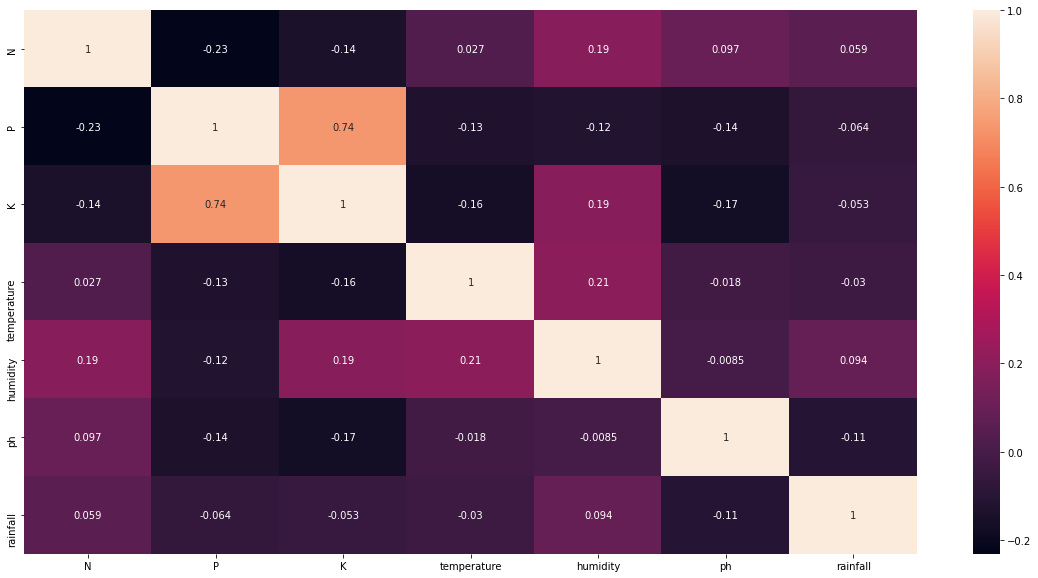

In [93]:
#showing the correlation heat map
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix,annot=True)

**Step 5: Splitting the data into training and testing data**

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

***Now let us train the data on different algorithms and findout their accuracies. The algorithms being used are:***  
*   Logistic Regression
*   K Nearest Neighbors 
*   Decision Tree Classifier
*   Random Forest Classifier











In [95]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)


In [96]:
#ACCURACY OF LOGISTIC REGRESSION MODEL
a = metrics.accuracy_score(y_test,lr_pred)
a

0.95

In [97]:
#K NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)


In [98]:
#ACCURACY OF KNN
b = metrics.accuracy_score(y_test,knn_pred)
b

0.9787878787878788

In [99]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)


In [100]:
#ACCURACY OF DECISION TREE CLASSIFIER
c = metrics.accuracy_score(y_test,dt_pred)
c

0.9803030303030303

In [101]:
#RANDOM FOREST CLASSIIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)


In [102]:
d = metrics.accuracy_score(y_test,rf_pred)
d

0.9939393939393939

**Step 6: Detailed comparision of the algorithms**

In [103]:
models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0)))

model_name = []
accuracy = []

for name, model in models: 
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print(name, metrics.accuracy_score(y_test,y_pred))


LogisticRegression 0.95
DecisionTreeClassifier 0.9803030303030303
KNeighborsClassifier 0.9787878787878788
RandomForestClassifier 0.9939393939393939


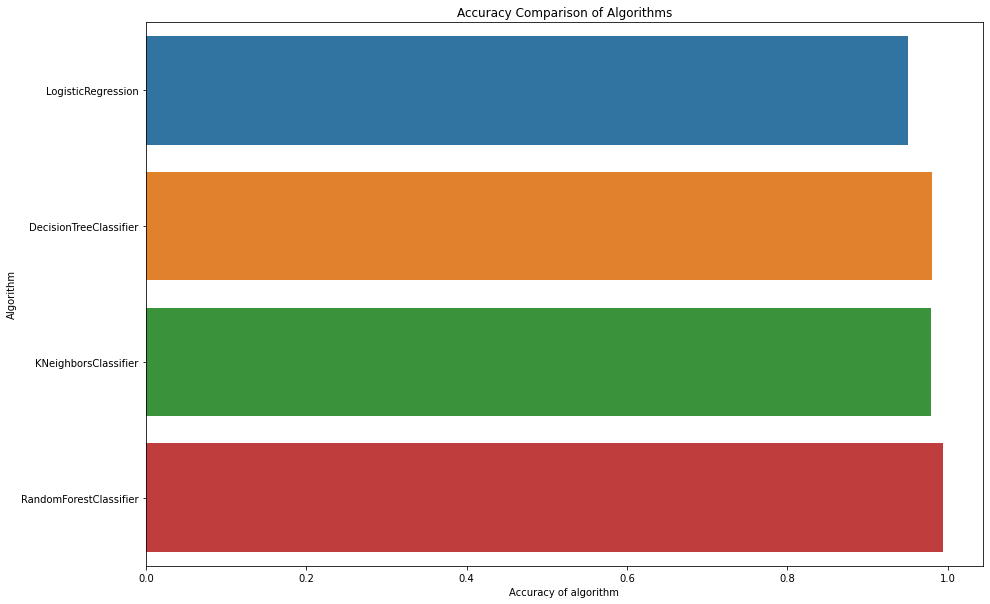

In [104]:
#Bar plot showing the comparision of all the algorithms
plt.figure(figsize=(15,10))
plt.title('Accuracy Comparison of Algorithms')
plt.xlabel('Accuracy of algorithm')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy, y = model_name)
plt.show()

***From above plot we come to know that the random forest classifier gives the highest accuracy and hence we afe going to use it for all further predictions***

**Step 7: Making a prediction from random data using RANDOM FOREST CLASSIFIER**

In [105]:
df = np.array([[85,18, 30, 20.603016, 60.3, 7.7, 40.91]])
prediction = rf.predict(df)
print(prediction)

['watermelon']
